In [172]:
from IPython.display import Markdown

markdown_text = '''
# Easy
1. How many unique customers are in the dataset?

2. What are the different categories of products available? How many unique categories are there?

3. Which payment method is the most popular? How many times was it used?
'''
display(Markdown(markdown_text))


# Easy
1. How many unique customers are in the dataset?

2. What are the different categories of products available? How many unique categories are there?

3. Which payment method is the most popular? How many times was it used?


In [167]:
import pandas as pd #first step import all the stuff
df_1 = pd.read_csv("fct_invoice.csv")
df_2 = pd.read_json("dim_customer.json")
df_1 #i want to see the table

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [168]:
df_2 #i want to see the table

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [63]:
print("1. How many unique customers are in the dataset?")

customer_id = df_2['id'].unique()
num_unique_customers = len(customer_id)
print("There are",num_unique_customers,"unique customers in the dataset.")

1. How many unique customers are in the dataset?
There are 5191 unique customers in the dataset.


In [78]:
print("2. What are the different categories of products available? How many unique categories are there?")

product_category = df_1["category"].unique() #this is to get the column categories
num_of_categories = len(product_category)

print("The different categories are", product_category,"which is a total of", num_of_categories,"categories.")

2. What are the different categories of products available? How many unique categories are there?
The different categories are ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir'] which is a total of 8 categories.


In [74]:
print("3. Which payment method is the most popular? How many times was it used?")

payment_method = df_1['payment_method'].unique() #to get the different types of payment methods avail

payment_is_cc = df_1['payment_method'] == 'Credit Card' #filter out credit card payments
df_cc = df_1[payment_is_cc]
credit_card_count = df_cc['payment_method'].value_counts()['Credit Card'] #counts credit card payments

payment_is_dc = df_1['payment_method'] == 'Debit Card' #filter out debit cards
df_dc = df_1[payment_is_dc]
debit_card_count = df_dc['payment_method'].value_counts()['Debit Card'] #counts the debit card payments

payment_is_c = df_1['payment_method'] == 'Cash' #filter out cash payments
df_c = df_1[payment_is_c]
cash_count = df_c['payment_method'].value_counts()['Cash'] #counts cash payments

payments_count = [] #create a list for all payment counts
payments_count.append(('Credit Card', credit_card_count)) 
payments_count.append(('Debit Card', debit_card_count))
payments_count.append(('Cash', cash_count))

most_common_payment = max(payments_count, key=lambda x: x[1])[0] #gets the greatest value for payment count and returns its respective payment method
print("The most common payment is", most_common_payment, "which was used", cash_count, "times.") 

3. Which payment method is the most popular? How many times was it used?
The most common payment is Cash which was used 44447 times.


In [173]:
from IPython.display import Markdown

markdown_text = '''
# Moderate
1. What are the three most popular categories, by total sales?

2. What are the total sales attributed to customers over the age of 45?

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
'''
display(Markdown(markdown_text))


# Moderate
1. What are the three most popular categories, by total sales?

2. What are the total sales attributed to customers over the age of 45?

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)


In [94]:
print("1. What are the three most popular categories, by total sales?")
total_revenue = df_1['quantity'] * df_1['price']

df_1['total_revenue'] = total_revenue  # get the total sales
category_sales = df_1.groupby('category')['total_revenue'].sum()
top_3_categories = category_sales.nlargest(3)
print(top_3_categories)

1. What are the three most popular categories, by total sales?
category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_revenue, dtype: float64


In [119]:
print("2. What are the total sales attributed to customers over the age of 45?")

merged_tables = pd.merge(df_1, df_2, how = 'inner', left_on = 'customer_id', right_on = 'id')

age = 45
filtered_table = merged_tables[merged_tables['age'] > age]
over_45_sales = filtered_table['total_revenue'].sum()
print("The total sales attributed to customers over the age of 45 is Php",over_45_sales)

2. What are the total sales attributed to customers over the age of 45?
The total sales attributed to customers over the age of 45 is Php 82039768.15


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)


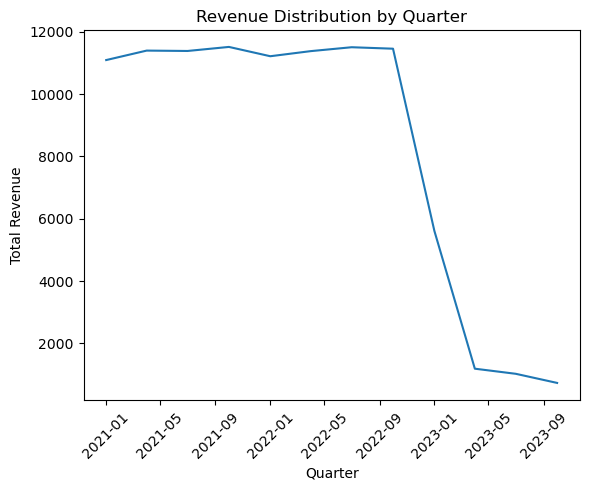

The graph above shows a consistent trend in revenue during the years 2021 and 2022 throughout every quarter. However, a downward trends in terms of revenue distribution during the recent years can be observed. This suggests a decline in revenue over time.


In [171]:
print("3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)")

import matplotlib.pyplot as plt
import time
from datetime import date

#Convert into Date-Time
merged_tables['invoice_date'] = pd.to_datetime(merged_tables['invoice_date'])
#Add a Quarter Column for easier categorizing
merged_tables['Quarter'] = merged_tables['invoice_date'].dt.to_period('Q')

# Count number of sales in each quarter
total_revenue_per_quarter = merged_tables.groupby('Quarter').size()

# Convert Period index to Datetime index
total_revenue_per_quarter.index = total_revenue_per_quarter.index.to_timestamp()

# Plotting
plt.plot(total_revenue_per_quarter.index, total_revenue_per_quarter.values)
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title('Revenue Distribution by Quarter')
plt.xticks(rotation=45)
plt.show()

print("The graph above shows a consistent trend in revenue during the years 2021 and 2022 throughout every quarter. However, a downward trends in terms of revenue distribution during the recent years can be observed. This suggests a decline in revenue over time.")

In [120]:
from IPython.display import Markdown

markdown_text = '''
# Hard
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
'''
display(Markdown(markdown_text))


# Hard
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).


In [133]:
print('1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).')

bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
merged_tables['age_range'] = pd.cut(merged_tables['age'], bins=bins, labels=labels, right=False)

pivot_table = pd.pivot_table(merged_tables, values='total_revenue', index='category', columns='age_range', aggfunc='sum')
pivot_table

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).


age_range,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,,
Books,0.0,7923.45,76022.70,87157.95,87885.15,72735.15,81885.75,57706.35,29224.35,0.0
Clothing,0.0,1144505.12,9959955.28,11540776.72,11447451.84,9943150.80,11083154.72,8061649.20,4812382.96,0.0
Cosmetics,0.0,65991.18,583796.28,731310.76,682396.78,563954.20,669832.84,443722.58,274495.66,0.0
Food & Beverage,0.0,9434.92,68633.29,87911.07,91922.48,72132.16,81488.63,58256.97,33879.94,0.0
Shoes,0.0,634379.69,5571978.28,7303468.73,7163028.95,5778436.76,6131336.72,4675324.30,2827400.87,0.0
Souvenir,0.0,6181.71,54438.93,63834.66,68444.55,54966.78,57418.35,38216.34,26662.29,0.0
Technology,0.0,739200.00,5053650.00,6298950.00,6082650.00,4458300.00,5421150.00,3808350.00,2134650.00,0.0
Toys,0.0,35911.68,366392.32,424704.00,408253.44,330516.48,370693.12,293888.00,162856.96,0.0
